<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-다운로드" data-toc-modified-id="데이터-다운로드-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 다운로드</a></span></li><li><span><a href="#데이터-분리" data-toc-modified-id="데이터-분리-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 분리</a></span></li><li><span><a href="#이진분류기:-5-검출" data-toc-modified-id="이진분류기:-5-검출-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>이진분류기: 5 검출</a></span></li><li><span><a href="#성능측정" data-toc-modified-id="성능측정-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>성능측정</a></span><ul class="toc-item"><li><span><a href="#교차검증" data-toc-modified-id="교차검증-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>교차검증</a></span></li><li><span><a href="#혼동행렬(confusion-matrix)" data-toc-modified-id="혼동행렬(confusion-matrix)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>혼동행렬(confusion matrix)</a></span></li><li><span><a href="#평가지표" data-toc-modified-id="평가지표-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>평가지표</a></span></li><li><span><a href="#Precision---Recall-trade-off" data-toc-modified-id="Precision---Recall-trade-off-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Precision - Recall trade off</a></span></li><li><span><a href="#ROC-curve" data-toc-modified-id="ROC-curve-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>ROC curve</a></span></li></ul></li><li><span><a href="#다중-분류기" data-toc-modified-id="다중-분류기-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>다중 분류기</a></span><ul class="toc-item"><li><span><a href="#에러-분석" data-toc-modified-id="에러-분석-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>에러 분석</a></span><ul class="toc-item"><li><span><a href="#혼동행렬" data-toc-modified-id="혼동행렬-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>혼동행렬</a></span></li></ul></li></ul></li></ul></div>

In [108]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc  # plot settings
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)


## 데이터 다운로드

In [226]:
from sklearn.datasets import fetch_openml
import pickle
import pandas as pd
import seaborn as sb

In [10]:
mnist = fetch_openml('mnist_784', version=1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [14]:
# with open('data/mnist.pickle', 'wb') as handle:
#     pickle.dump(mnist, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('data/mnist.pickle', 'rb') as handle:
    mnist = pickle.load(handle)

In [17]:
# check data
x, y = mnist['data'], mnist['target']
print(f'''
x shape: {x.shape}
y shape: {y.shape}
''')


x shape: (70000, 784)
y shape: (70000,)



In [18]:
import matplotlib.pyplot as plt

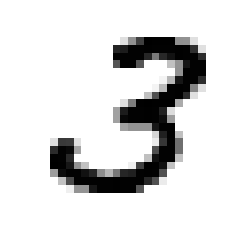

target: 3


In [28]:
def print_digit(x, y, row_num):
    x_img = x[row_num].reshape(28, 28)
    plt.imshow(x_img, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.show()
    print(f'target: {y[row_num]}')
    
print_digit(x, y, 341)

## 데이터 분리

* train set에 0-10까지의 숫자가 골고루 들어가야하기 때문에 인덱스를 섞는다.

In [29]:
import numpy as np

In [41]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
idx_shuffle = np.random.permutation(60000)
x_train, y_train = x_train[idx_shuffle], y_train[idx_shuffle]

## 이진분류기: 5 검출

In [43]:
from sklearn.linear_model import SGDClassifier

In [74]:
# 라벨 만들기, 5 검출
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

clf_sgd = SGDClassifier(max_iter=5, random_state=42)
clf_sgd.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

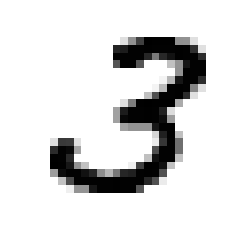

target: 3


array([False])

In [75]:
print_digit(x, y, 341)
clf_sgd.predict([x[341]])  # 3

## 성능측정

### 교차검증

In [52]:
from sklearn.model_selection import cross_val_score

In [73]:
cv_score_acc = cross_val_score(clf_sgd, x_train, y_train_5, cv=3, scoring='accuracy')
print(f'''
{cv_score_acc}
mean: {cv_score_acc.mean()}
''')


[0.95435 0.96645 0.9405 ]
mean: 0.9537666666666667



* 정확도(accuracy)를 기준으로 교차검증한 결과(3-fold) 평균 정확도가 95% 이상이다. 0-10까지의 숫자중 5의 비율은 0.1 이기때문에 모든 숫자가 5가 아니라고 예측해도 90%의 정확도를 얻을 수 있다.

In [56]:
from sklearn.base import BaseEstimator

In [63]:
# 모든 숫자가 5가 아니라고 예측하는 분류기

class Never5Classifier(BaseEstimator):
    
    def fit(self, x, y=None):
        pass
    
    
    def predict(self, x, y=None):
        return np.zeros((len(x), 1), dtype=bool)

clf_never5 = Never5Classifier()
cv_score_never5clf = cross_val_score(clf_never5, x_train, y_train_5, cv=3, scoring='accuracy')

print(f'''
{cv_score_never5clf}
mean: {cv_score_never5clf.mean()}
''')


[0.9117  0.9085  0.90875]
mean: 0.90965



### 혼동행렬(confusion matrix)

<img src="https://t1.daumcdn.net/cfile/tistory/995C7A3359E629C812">

* reference: [조대협의 블로그](https://bcho.tistory.com/tag/%ED%98%BC%EB%8F%99%20%ED%96%89%EB%A0%AC)

* (정오 여부, 예측값)으로 표기
    * True Positive: 정답, 양성으로 예측
    * False Negative: 오답, 음성으로 예측
    * False Positive: 오답, 양성으로 예측
    * True Negative: 정답, 음성으로 예측
    * P: TP + FN, 실제 양성 데이터 수
    * N: FP + TN, 실제 음성 데이터 수

In [81]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [80]:
y_train_pred = cross_val_predict(clf_sgd, x_train, y_train_5, cv=3)
y_train_never5_pred = cross_val_predict(clf_never5, x_train, y_train_5, cv=3)

cm = confusion_matrix(y_train_5, y_train_pred)
cm_never5 = confusion_matrix(y_train_5, y_train_never5_pred)

print(f'''
sgd: 
{cm}
never 5 classifier: 
{cm_never5}
''')


sgd: 
[[53435  1144]
 [ 1630  3791]]
never 5 classifier: 
[[54579     0]
 [ 5421     0]]



### 평가지표
* 정밀도: 실제 양성 / 예측한 양성
* 특이도: 실제 음성 / 예측한 음성
* 재현율: 예측한 양성 / 실제 양성
* FPR: 실제 양성 / 예측한 음성
* f1score: 정밀도 재현율 조화평균

In [152]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, average_precision_score,roc_auc_score
from inspect import signature

* 예측을 정확하게 했을 경우
<img src='https://t1.daumcdn.net/cfile/tistory/99B5CE3359E629C81D'>

* 일반적인 경우
<img src='https://t1.daumcdn.net/cfile/tistory/99EFFA3359E629C82B'>


**정밀도(Precision)**
<img src='https://t1.daumcdn.net/cfile/tistory/99EF6B3359E629C81F'>

* 양성이라고 예측한 데이터 중 실제로 양성인 데이터의 비율
* precision = TP / FP + TP


**재현율(Recall, True Positive Rate(TPR))**
<img src='https://t1.daumcdn.net/cfile/tistory/9967C33359E629C832'>
   
* 실제 양성 데이터 중 양성이라고 예측한 데이터의 비율
* 양성 데이터를 잘 검출했는가?
* recall = TP / FN + TP

**특이도(Specificity, True Negative Rate(TNR))**
<img src='https://t1.daumcdn.net/cfile/tistory/99B3523359E629C824'>

* 음성이라고 예측한 데이터 중 실제로 음성인 데이터의 비율
* TN / (FP + TN)

**FPR(False Positive Rate, 1-특이도)**
<img src='https://t1.daumcdn.net/cfile/tistory/99B4BE3359E629C813'>

* 음성이라고 예측한 데이터 중 실제 양성 데이터의 비율
* FPR = FP / TN + FP

**정확도(Accuracy)**
* 전체 데이터 중 제대로 분류된 데이터의 수
* ACC = (TP + TN) / (TP + TN + FP + FN)
* Error rate = (FN + FP) / (TP + TN + FP + FN)

### Precision - Recall trade off
* `기준확률`이 증가하면( 그림에서 `사선`이 위로 올라가는 경우)
    * 재현률 감소 한다.
        * TP / (FN + TP) 에서 분모(실제 양성 데이터)는 일정하지만 TP가 감소한다.
        * 원만하게 감소한다.
    * 정밀도 증가 한다.
        * TP / (FP + TP) 에서 분모가 분자보다 빠르게 감소한다. FP는 음성 데이터를 양성 데이터로 판단한 경우인데 기준확률이 증가하면 FP가 감소한다. 
        * 그래프 우상단이 울퉁불퉁한 이유는 기준확률이 증가해도 정밀도가 감소하는 경우가 있기때문이다.
        
        
<img src = 'https://t1.daumcdn.net/cfile/tistory/9983FE3359E629C815'>

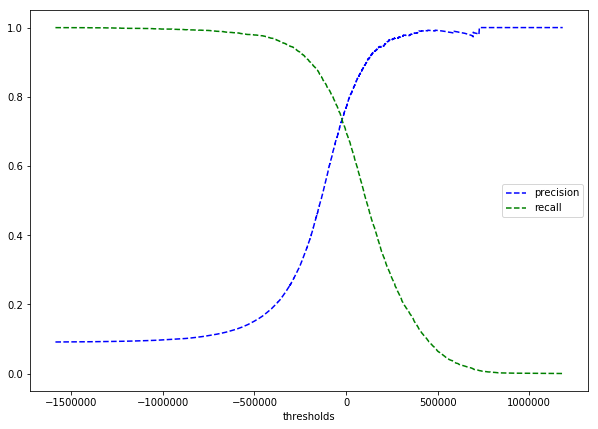

In [89]:
y_scores = cross_val_predict(clf_sgd, x_train, y_train_5, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.figure(figsize=(10, 7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label='recall')
plt.xlabel('thresholds')
plt.legend(loc='center right')
plt.show()

Text(0.5, 1.0, 'PR curve: AP=0.80')

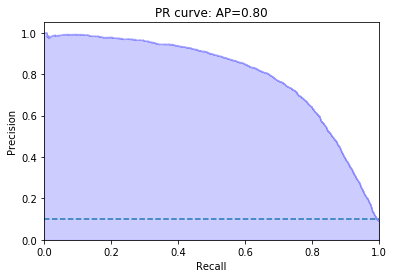

In [102]:
ap = average_precision_score(y_train_5, y_scores)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recalls, precisions, color='b', alpha=0.2, where='post')
plt.fill_between(recalls, precisions, alpha=0.2, color='b', **step_kwargs)
baseline = .1
plt.axhline(baseline, ls='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve: AP={0:0.2f}'.format(ap))

### ROC curve

<img src='https://t1.daumcdn.net/cfile/tistory/99C7EC3359E629C802'>

* FPR(1-특이도, 음성으로 예측한 데이터 중 실제 양성 데이터) 에 대한 재현률 그래프
    * 일반적으로 TPR이 높으면 FPR도 커진다.
    * 음성으로 잘못 예측한 데이터가 적고, 양성을 맞춘 데이터가 많으면 좋은것
    * tpr, fpr 그래프에서 threshold가 -250000 즈음일 때 fpr이 작고 tpr이 크다

In [175]:
def roc_fpr_tpr(y_train, y_scores):
    
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    auc_score = roc_auc_score(y_train, y_scores)

    fig, ax = plt.subplots(2, 1, figsize=[12,10])

    ax[0].plot(fpr, tpr, lw=2)
    ax[0].plot([0, 1], [0, 1], 'k--')
    ax[0].set_xlabel('FPR, 양성인데 음성으로 잘못 때림')
    ax[0].set_ylabel('TPR, 양성을 잘 때림')
    ax[0].set_title('ROC curve auc: {0:0.3f}'.format(auc_score))

    ax[1].plot(thresholds, tpr, lw=2, color='b', label='tpr')
    ax[1].plot(thresholds, fpr, lw=2, color='r', label='fpr')

    ax[1].set_xlabel('tresholds')
    ax[1].set_title('tpr, fpr vs threshold')
    ax[1].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

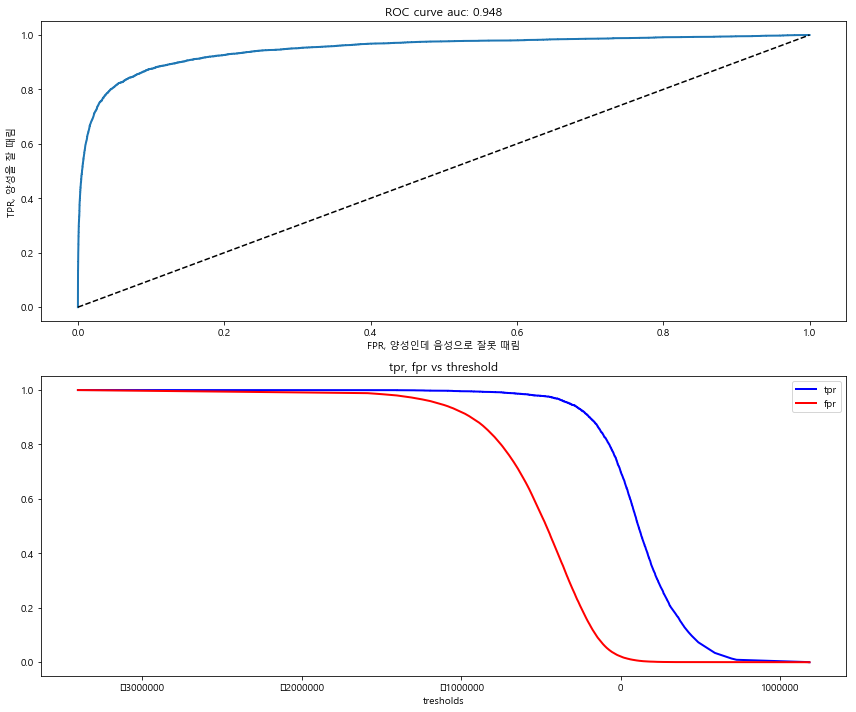


precision sgd: 0.31326727737271765
recall sgd: 0.9273196827153661



In [194]:
roc_fpr_tpr(y_train_5, y_scores)
y_pred = (y_scores > -250000)

precision_sgd = precision_score(y_train_5, y_pred)
recall_sgd = recall_score(y_train_5, y_pred)
print(f'''
precision sgd: {precision_sgd}
recall sgd: {recall_sgd}
''')

In [177]:
# randomforest
from sklearn.ensemble import RandomForestClassifier

In [178]:
clf_rf = RandomForestClassifier(n_estimators=10, random_state=42)
y_proba_rf = cross_val_predict(clf_rf, x_train, y_train_5, cv=3, method='predict_proba')

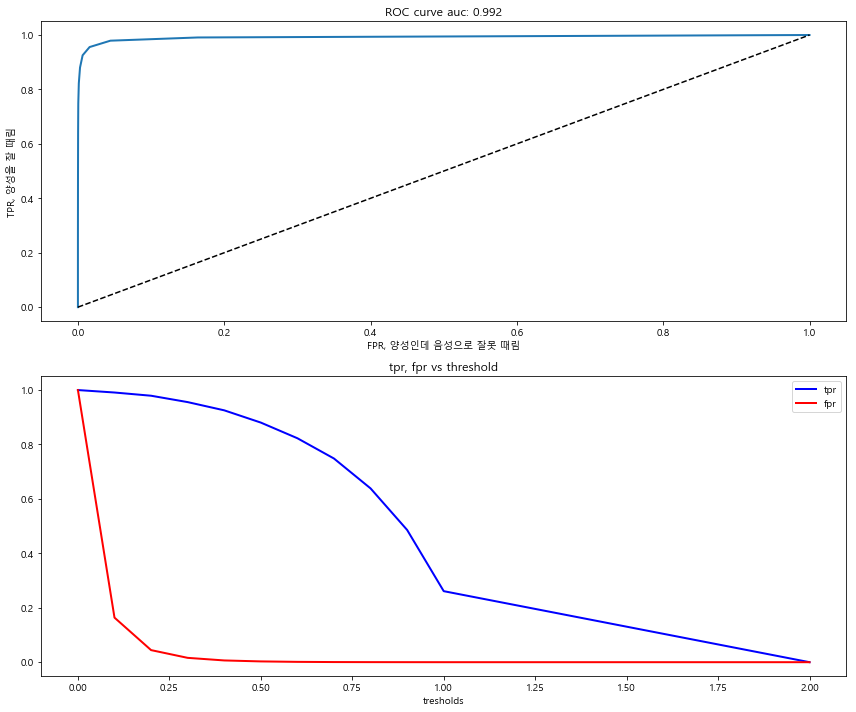


precision randomforest: 0.9852031802120141
recall randomforest: 0.8229109020475927



In [187]:
y_scores_rf = y_proba_rf[:, 1]
roc_fpr_tpr(y_train_5, y_scores_rf)
y_pred_rf = (y_proba_rf[:, 1] > .5)

precision_rf = precision_score(y_train_5, y_pred_rf)
recall_rf = recall_score(y_train_5, y_pred_rf)
print(f'''
precision randomforest: {precision_rf}
recall randomforest: {recall_rf}
''')

## 다중 분류기
* OVA(One vs All)
    * 0부터 9까지 구별하는 이진분류기를 하나씩 만들어 적용
* OVO(One vs One)
    * 2개씩 숫자조합을 형성해 nC2 개 이진분류기 생성(ex: 1-2 구분 1-3 구분 0-4 구분...)
* sklearn 은 클래스가 다수일 경우 OVA 적용

In [210]:
from sklearn.preprocessing import StandardScaler

In [197]:
# sdg
clf_sgd.fit(x_train, y_train)  # OVA 다중분류

array(['5'], dtype='<U1')

In [203]:
print(f'''
{clf_sgd.predict([x_train[42]])}
{clf_sgd.decision_function([x_train[42]])}
''')
# 점수가 제일 높은 클래스가 5


['5']
[[ -516545.38726875  -688587.28587535  -422047.39000397  -102578.03706291
   -397731.98609225   194072.4368544  -1026473.3968415   -616146.98193258
   -273509.23546446  -421152.0380898 ]]



In [200]:
# random forest
clf_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [207]:
clf_rf.predict_proba([x_train[42]])

array([[0. , 0. , 0. , 0.1, 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [208]:
# 그냥 찍을 경우 정확도는 0.1
cross_val_score(clf_rf, x_train, y_train, cv=3, scoring='accuracy')

array([0.93881224, 0.94049702, 0.94124119])

In [213]:
# 스케일링 전 후 차이
before_scaling_score = cross_val_score(clf_sgd, x_train, y_train, cv=3, scoring='accuracy')
std_scaler = StandardScaler()
x_train_scaler = std_scaler.fit_transform(x_train)
after_scaling_score = cross_val_score(clf_sgd, x_train_scaler, y_train, cv=3, scoring='accuracy')

print(f'''
before scaling: {before_scaling_score}
after scaling: {after_scaling_score}
''')


before scaling: [0.87362527 0.87109355 0.88558284]
after scaling: [0.90976805 0.90909545 0.91028654]



### 에러 분석

#### 혼동행렬

In [216]:
y_train_pred = cross_val_predict(clf_sgd, x_train_scaler, y_train, cv=3)
cm_sgd = confusion_matrix(y_train, y_train_pred)
cm_sgd

array([[5738,    2,   22,   10,   12,   44,   42,    8,   42,    3],
       [   2, 6489,   42,   26,    5,   43,    8,   10,  108,    9],
       [  49,   35, 5336,  105,   84,   27,   90,   52,  163,   17],
       [  52,   47,  135, 5330,    3,  237,   38,   57,  141,   91],
       [  18,   28,   37,    9, 5365,   10,   48,   32,   84,  211],
       [  66,   46,   40,  173,   87, 4597,  109,   30,  183,   90],
       [  32,   26,   54,    3,   48,   91, 5613,    5,   46,    0],
       [  18,   29,   71,   26,   55,   10,    6, 5825,   13,  212],
       [  49,  172,   65,  139,   12,  154,   62,   28, 5042,  128],
       [  38,   43,   26,   87,  169,   32,    2,  211,   93, 5248]],
      dtype=int64)

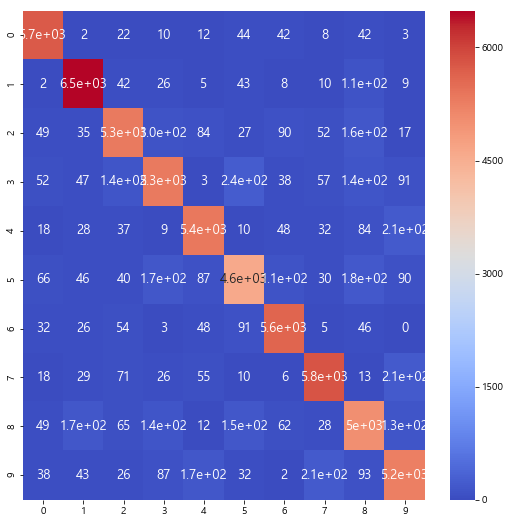

In [240]:
cm_df = pd.DataFrame(cm_sgd)
plt.figure(figsize=(9,9))
sb.heatmap(cm_df, annot=True, annot_kws={'size': 13}, cmap='coolwarm')
plt.show()

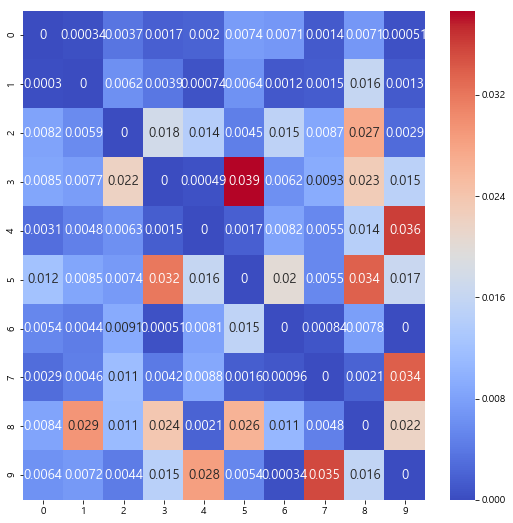

In [239]:
# 오차행렬의 값을 대응하는 클래스의 데이터 수로 나눈다. 개수로 비교하면 이미지가 많은 클래스가 상대적으로 나쁘게 보임.
row_sums = cm_sgd.sum(axis=1, keepdims=True)
cm_norm_sgd = cm_sgd / row_sums
# 대각 행렬 값을 0으로 채운다. 
np.fill_diagonal(cm_norm_sgd, 0)
cm_df = pd.DataFrame(cm_norm_sgd)
plt.figure(figsize=(9,9))
sb.heatmap(cm_df, annot=True, annot_kws={'size': 13}, cmap='coolwarm')
plt.show()

* col 8,9: 많은 이미지가 8,9로 잘못 분류됐다.
* row 8,9: 8,9 이미지가 다른 숫자로 잘못 분류됐다.
* 실제 3을 5로 혼동했다.
* 실제 5를 3으로 혼동했다.

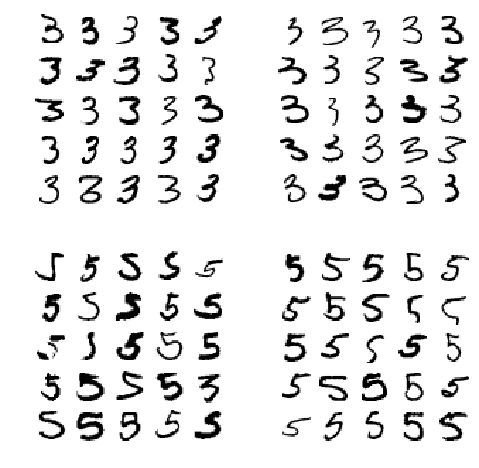

In [251]:
# 실제 숫자를 확인해보자

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'binary', **options)
    plt.axis("off")

x_33 = x_train[(y_train == '3') & (y_train_pred== '3')]  # 실제 3, 예측 3
x_35 = x_train[(y_train == '3') & (y_train_pred== '5')]  # 실제 3, 예측 5
x_53 = x_train[(y_train == '5') & (y_train_pred== '3')]  # 실제 5, 예측 3
x_55 = x_train[(y_train == '5') & (y_train_pred== '5')]  # 실제 5, 예측 5

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(x_33[:25], images_per_row=5)
plt.subplot(222); plot_digits(x_35[:25], images_per_row=5)
plt.subplot(223); plot_digits(x_53[:25], images_per_row=5)
plt.subplot(224); plot_digits(x_55[:25], images_per_row=5)

* 5와 3은 눈으로 보기에 위쪽밖에 차이가 없어 분류하기 어렵다. sgd 는 픽셀 가중치를 기준으로 분류하기 때문에 오차가 많이 난다. 3을 조금만 회전해도 5로 분류할 수 있다.
    * 하단부를 중심으로 히전하지 않도록 전처리